In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 60
from gensim.models import KeyedVectors

PATH = "/content/drive/MyDrive/dataset/"

# Word2vec modelを読み込んむ
model = KeyedVectors.load_word2vec_format(
   PATH +  "GoogleNews-vectors-negative300.bin", binary=True
)

# "United States"の単語ベクトルを表示する
print(model.get_vector("United_States"))

[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281250e-01 -2.79541016e-02 -1.21093750e-01  2.47802734e-02
  7.71484375e-02 -2.81982

In [ ]:
# 61
# cos類似度を計算する
model.similarity("United_States", "U.S.")

0.73107743

In [ ]:
# 62
# "United States"とコサイン類似度が高い10語
model.most_similar("United_States", topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370987892151),
 ('United_Sates', 0.7400724291801453),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.601906955242157)]

In [ ]:
# 63
model.most_similar_cosmul(positive=["Spain", "Athens"], negative=["Madrid"], topn=10)
# positive=["Spain", "Athens"] Spain + Athens
# negative=["Madrid"] -Madrid

[('Greece', 0.9562304615974426),
 ('Aristeidis_Grigoriadis', 0.8694582581520081),
 ('Ioannis_Drymonakos', 0.8600283265113831),
 ('Ioannis_Christou', 0.8544449806213379),
 ('Greeks', 0.8521003127098083),
 ('Hrysopiyi_Devetzi', 0.8383886814117432),
 ('Panagiotis_Gionis', 0.8323913216590881),
 ('Heraklio', 0.8297829627990723),
 ('Lithuania', 0.8291547298431396),
 ('Periklis_Iakovakis', 0.8289120197296143)]

In [ ]:
# 64
import pandas as pd

with open(PATH + "questions-words.txt") as f:

    lines = f.readlines()
    word_1 = []
    word_2 = []
    word_3 = []
    word_4 = []
    df = pd.DataFrame()

    for i, line in enumerate(lines, 1):

        if line[0] == ":":
            # : capital-common-countriesを処理するため
            category = line
            # categoryを取る

            if len(word_1) != 0:
                # 次のcategoryを取るとき、以前のwordデータを空にする
                df_temp = pd.DataFrame(
                    {
                        "1st_word": word_1,
                        "2nd_word": word_2,
                        "3rd_word": word_3,
                        "4th_word": word_4,
                    }
                )
                df_temp["Category"] = category.replace("\n", "").replace(":", "")
                df = pd.concat([df, df_temp])
                word_1 = []
                word_2 = []
                word_3 = []
                word_4 = []

        else:
            # Athens Greece Baghdad Iraqを処理するため
            word = line.split(" ")
            word_1.append(word[0])
            word_2.append(word[1])
            word_3.append(word[2])
            word_4.append(word[3].replace("\n", ""))
            if len(lines) == i:
                # 同じCategoryのデータを書き込む
                df_temp = pd.DataFrame(
                    {
                        "1st_word": word_1,
                        "2nd_word": word_2,
                        "3rd_word": word_3,
                        "4th_word": word_4,
                    }
                )
                df_temp["Category"] = category.replace("\n", "").replace(":", "")
                df = pd.concat([df, df_temp])

    df = df.reset_index()
    print(df.head())

def CaculateWordVec(X):
    # 類似度を計算する
    result = model.most_similar(positive=[X["2nd_word"], X["3rd_word"]], negative=[X["1st_word"]], topn=1)[0]
    return result[0], result[1]
    # 単語、類似度をもらう

df[["Pred_word", "similarity"]] = df.apply(
    CaculateWordVec, axis=1, result_type="expand"
)
# ファイルの毎行目CaculateWordVec関数をする
# もらった単語、類似度を["Pred_word", "similarity"]に入れる
df.to_csv(PATH + "Anology_example.csv")
print(df.head())

   index 1st_word 2nd_word 3rd_word     4th_word        Category
0      0   Athens   Greece  Baghdad         Iraq   capital-world
1      1   Athens   Greece  Bangkok     Thailand   capital-world
2      2   Athens   Greece  Beijing        China   capital-world
3      3   Athens   Greece   Berlin      Germany   capital-world
4      4   Athens   Greece     Bern  Switzerland   capital-world
   index 1st_word 2nd_word 3rd_word     4th_word        Category    Pred_word  \
0      0   Athens   Greece  Baghdad         Iraq   capital-world        Iraqi   
1      1   Athens   Greece  Bangkok     Thailand   capital-world     Thailand   
2      2   Athens   Greece  Beijing        China   capital-world        China   
3      3   Athens   Greece   Berlin      Germany   capital-world      Germany   
4      4   Athens   Greece     Bern  Switzerland   capital-world  Switzerland   

   similarity  
0    0.635187  
1    0.713767  
2    0.723578  
3    0.673462  
4    0.491975  


In [5]:
# 65
import pandas as pd

PATH = "/content/drive/MyDrive/dataset/"

df = pd.read_csv(PATH + "Anology_example.csv")
print(df.head())

# 意味的アナロジー（semantic analogy）
# 意味的に近い
df_semantic = df[df["Category"].str.contains("gram")]
# Categoryにgramが含めているもの

# 文法的アナロジー
# 文法的に近い
df_syntactic = df[~df["Category"].str.contains("gram")]
# Categoryにgramが含めていないもの

df_semantic_true = df_semantic[df_semantic["4th_word"]==df_semantic["Pred_word"]]
df_syntactic_true = df_syntactic[df_syntactic["4th_word"]==df_syntactic["Pred_word"]]
# 正しく予測したもの

semantic_analogy = len(df_semantic_true)/len(df_semantic)
syntactic_analogy = len(df_syntactic_true)/len(df_syntactic)
# 正しく予測したもの/全てのもの

print("semantic analogy:", semantic_analogy)
print("syntactic analogy:", syntactic_analogy)

   Unnamed: 0  index 1st_word 2nd_word 3rd_word     4th_word        Category  \
0           0      0   Athens   Greece  Baghdad         Iraq   capital-world   
1           1      1   Athens   Greece  Bangkok     Thailand   capital-world   
2           2      2   Athens   Greece  Beijing        China   capital-world   
3           3      3   Athens   Greece   Berlin      Germany   capital-world   
4           4      4   Athens   Greece     Bern  Switzerland   capital-world   

     Pred_word  similarity  
0        Iraqi    0.635187  
1     Thailand    0.713767  
2        China    0.723578  
3      Germany    0.673462  
4  Switzerland    0.491975  
semantic analogy: 0.7448349879259458
syntactic analogy: 0.7239029056558651


In [6]:
# 66
from gensim.models import KeyedVectors
from scipy.stats import spearmanr
import pandas as pd

# Word2vec modelを読み込んむ
model = KeyedVectors.load_word2vec_format(
   PATH +  "GoogleNews-vectors-negative300.bin", binary=True
)

# fileを読み込む
df = pd.read_csv(PATH + "wordsim353/combined.csv")

# cos類似度を計算する
Cossim = lambda X:model.similarity(X["Word 1"], X["Word 2"])
# dfに応用して
wordvec = df.apply(Cossim, axis=1)

# spearman スピアマン相関係数 [-1, 1]
# 値が1に近ければ近いほど、2つの変数の順位に一貫性があることを示す
# p値
# 相関係数の有意性を検定するために使用される
spearman , pvalue = spearmanr(wordvec, df["Human (mean)"])
print("スピアマン相関係数:", spearman )
print("p値:", pvalue)

スピアマン相関係数: 0.7000166486272194
p値: 2.86866666051422e-53


In [36]:
# ネットからdownloadした　country data
# 67

# country dataを整理する
df = pd.read_csv(PATH + "countries.csv")
# df.head()

df_countries = df[["code","name"]]
df_countries.rename(columns={"code":"Code","name":"Country"}, inplace=True)
df_countries = df_countries.dropna()
df_countries = df_countries.reset_index(drop=True)
print(df_countries.head())

df_countries.to_csv(PATH + "country_map.csv")


  Code      Country
0  ABW        Aruba
1  AFG  Afghanistan
2  AGO       Angola
3  ALB      Albania
4  AND      Andorra


<ipython-input-36-65a44db7e690>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries.rename(columns={"code":"Code","name":"Country"}, inplace=True)


In [38]:
# 67
from gensim.models import KeyedVectors
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd


model = KeyedVectors.load_word2vec_format(PATH + "GoogleNews-vectors-negative300.bin", binary=True)

df = pd.read_csv(PATH + "country_map.csv")

country_name = df["Country"].tolist()
vector_list = []
country_name_fix = []

for name in country_name:
  try:
    vec = np.array(model.get_vector(name),"float64")
    vector_list.append(vec)
    # 単語ベクトルをもらう

    country_name_fix.append(name)
    # 処理した国名を保存する

  except:
    pass

pred = KMeans(n_clusters = 5).fit_predict(vector_list)
# k-meansクラスタリングをクラスタ数k=5として実行する
dic = {}

for cat, name in zip(pred, country_name_fix):
    dic.setdefault(cat, []).append(name)

dic

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{1: ['Aruba',
  'Argentina',
  'Bahamas',
  'Belize',
  'Bermuda',
  'Bolivia',
  'Brazil',
  'Barbados',
  'Chile',
  'Colombia',
  'Cuba',
  'Dominica',
  'Dominican',
  'Ecuador',
  'Grenada',
  'Guatemala',
  'Guyana',
  'Honduras',
  'Haiti',
  'Jamaica',
  'Mexico',
  'Montserrat',
  'Martinique',
  'Nicaragua',
  'Panama',
  'Peru',
  'Paraguay',
  'Suriname',
  'Uruguay',
  'Venezuela'],
 4: ['Afghanistan',
  'Australia',
  'Bangladesh',
  'Bahrian',
  'Brunei',
  'Bhutan',
  'Canada',
  'China',
  'Egypt',
  'Gibraltar',
  'Greenland',
  'Indonesia',
  'India',
  'Iran',
  'Iraq',
  'Israel',
  'Jordan',
  'Japan',
  'Kirghizia',
  'Cambodia',
  'Korea',
  'Kuwait',
  'Laos',
  'Lebanon',
  'Morocco',
  'Maldives',
  'Myanmar',
  'Mongolia',
  'Mauritius',
  'Malaysia',
  'Mayotte',
  'Nepal',
  'Oman',
  'Pakistan',
  'Philippines',
  'Palestine',
  'Qatar',
  'Reunion',
  'Singapore',
  'Syrian',
  'Chad',
  'Thailand',
  'Tajikistan',
  'Turkmenistan',
  'Vietnam'],
 0: ['A

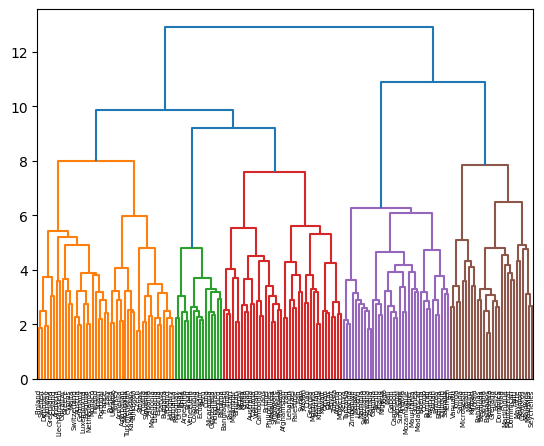

In [41]:
# 68
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

fig = plt.figure()
Z = linkage(vector_list, 'ward')
dn = dendrogram(Z, labels = country_name_fix)
plt.show()
# Dendrogram を描く

fig.savefig(PATH + "output/dendrogram.pdf")

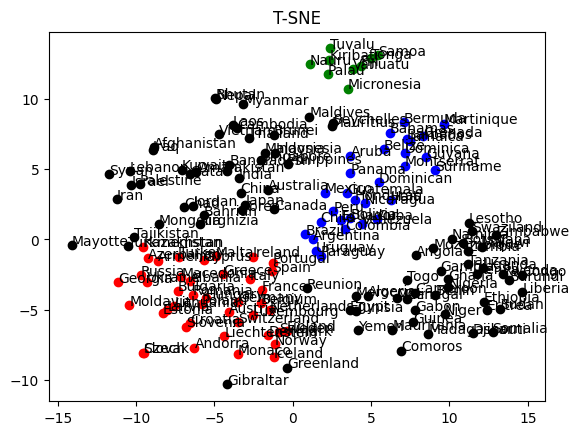

In [43]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

vec_list = np.array(vector_list)
tsne = TSNE(n_components=2, random_state=0)
tsne_result = tsne.fit_transform(vec_list)


col_list = ["Blue", "Red", "Green", "Black"]
for X, name, km in zip(tsne_result, country_name_fix, pred):
    plt.plot(X[0], X[1], color = col_list[km-1], marker="o")
    # 同じグループは同じ色にする
    plt.annotate(name, xy=(X[0], X[1]))

plt.title("T-SNE")
plt.savefig(PATH + "/output/TSNE.png")
plt.show()